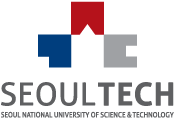

# Lab Session \# 04
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective

The objectives of this lab session are as follows:

1.   Introduce [Seaborn](https://seaborn.pydata.org/), a high level visualization library that is used for creating visualization plots that are useful for doing Exploratory Data Analysis (EDA).

2. Introduce the student to different data visualization techniques for helping to understand the characteristics and behavior of the target variable in predictive models.

3. Likewise, the techniques are also useful for understanding the relationship of the predictor variables in two ways, between themselves and with the target variable.

The analysis presented in this labsession is based on [Chapter 4](http://www.feat.engineering/exploratory-visualizations.html) of the book **Feature engineering and selection: A practical approach for predictive models**. You can check it out for a more detailed explanation of the analysis process.

## Importing libraries and uploading data to various pandas DataFrames


The libraries that we will import to start with are pandas and numpy for data handling, and matplotlib and seaborn for generating visualizations.

Data were obtained from [Chicago data portal](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f).

The data needs some preprocessing, but that is not the point of this Lab Session, so I am including two extra files. The first is where the days used for the analysis are recorded, and the second are attributes created by the author of the book.

In [1]:
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir data

In [4]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG', # chicago_train_data  https://drive.google.com/file/d/1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-', # train_days   https://drive.google.com/file/d/1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN', # extra data chicago https://drive.google.com/file/d/18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o', # chichago_gas_prices https://drive.google.com/file/d/13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX' # https://drive.google.com/file/d/1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX/view?usp=sharing
        ]
outputs = ['chicago_train_data.csv','train_days.csv' ,
           'extra_data_chicago.csv','chicago_gas_prices.csv',
           'lag_14_data.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG
To: /content/data/chicago_train_data.csv
100%|██████████| 38.2M/38.2M [00:00<00:00, 49.9MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-
To: /content/data/train_days.csv
100%|██████████| 107k/107k [00:00<00:00, 54.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN
To: /content/data/extra_data_chicago.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o
To: /content/data/chicago_gas_prices.csv
100%|██████████| 14.2k/14.2k [00:00<00:00, 12.9MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX
To: /content/data/lag_14_data.csv
100%|██████████| 4.25M/4.25M [00:00<00:00, 22.6MB/s]


In [5]:
df = pd.read_csv('data/chicago_train_data.csv', parse_dates=True, index_col=2)
train_days = pd.read_csv('data/train_days.csv',index_col=1, parse_dates=True)
extra_data = pd.read_csv('data/extra_data_chicago.csv',index_col=0, parse_dates=True)

In [6]:
df.head()

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499


In [7]:
df.describe()

,station_id,rides
count,1.036763e+06,1.036763e+06
mean,4.076441e+04,3.226514e+03
std,4.478133e+02,3.196655e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,1.051000e+03
50%,4.076000e+04,2.198000e+03
75%,4.115000e+04,4.243000e+03
max,4.170000e+04,3.632300e+04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036763 entries, 2017-12-22 to 2020-11-30
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1036763 non-null  int64 
 1   stationname  1036763 non-null  object
 2   daytype      1036763 non-null  object
 3   rides        1036763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.5+ MB


In [9]:
df = df.sort_index()
df.head(3)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457
2001-01-01,41130,Halsted-Orange,U,306
2001-01-01,40350,UIC-Halsted,U,273


In [10]:
train_days.index

DatetimeIndex(['2001-01-22', '2001-01-23', '2001-01-24', '2001-01-25',
               '2001-01-26', '2001-01-27', '2001-01-28', '2001-01-29',
               '2001-01-30', '2001-01-31',
               ...
               '2016-08-19', '2016-08-20', '2016-08-21', '2016-08-22',
               '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-27', '2016-08-28'],
              dtype='datetime64[ns]', name='date', length=5698, freq=None)

In [11]:
df.loc[train_days.index]

,station_id,stationname,daytype,rides
date,,,,
2001-01-22,40240,79th,W,7697
2001-01-22,40090,Damen-Brown,W,2035
2001-01-22,40120,35th/Archer,W,2150
2001-01-22,41260,Austin-Lake,W,2053
2001-01-22,40750,Harlem-O'Hare,W,2665
...,...,...,...,...
2016-08-28,41090,Monroe/State,U,3192
2016-08-28,40040,Quincy/Wells,U,1302
2016-08-28,40830,18th,U,1022


In [12]:
df.index.year.unique()

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='date')

In [13]:
df[df['stationname']=='Clark/Lake']

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,40380,Clark/Lake,U,1080
2001-01-02,40380,Clark/Lake,W,13263
2001-01-03,40380,Clark/Lake,W,14416
2001-01-04,40380,Clark/Lake,W,15118
2001-01-05,40380,Clark/Lake,W,14980
...,...,...,...,...
2020-11-26,40380,Clark/Lake,U,690
2020-11-27,40380,Clark/Lake,W,1199
2020-11-28,40380,Clark/Lake,A,1183


In [14]:
df_cl = df[df['stationname']=='Clark/Lake'][['rides']]
df_cl

,rides
date,
2001-01-01,1080
2001-01-02,13263
2001-01-03,14416
2001-01-04,15118
2001-01-05,14980
...,...
2020-11-26,690
2020-11-27,1199
2020-11-28,1183


In [15]:
df_cl.index.weekday

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='date', length=7275)

In [16]:
df_cl['part_of_the_week']=df_cl.index.weekday.map(lambda x: 'Weekday' if x<5 else 'weekend')
df_cl['rides_x1000']=df_cl.rides/1000 # transform
df_cl

,rides,part_of_the_week,rides_x1000
date,,,
2001-01-01,1080,Weekday,1.080
2001-01-02,13263,Weekday,13.263
2001-01-03,14416,Weekday,14.416
2001-01-04,15118,Weekday,15.118
2001-01-05,14980,Weekday,14.980
...,...,...,...
2020-11-26,690,Weekday,0.690
2020-11-27,1199,Weekday,1.199
2020-11-28,1183,weekend,1.183


In [17]:
df_cl.index.duplicated()

array([False, False, False, ..., False, False, False])

In [18]:
df_cl.index.duplicated().sum()

1

In [19]:
df_cl.loc[df_cl.index.duplicated()]

,rides,part_of_the_week,rides_x1000
date,,,
2011-07-03,5573,weekend,5.573


In [20]:
df_cl.loc['2011-07-03']

,rides,part_of_the_week,rides_x1000
date,,,
2011-07-03,5574,weekend,5.574
2011-07-03,5573,weekend,5.573


In [21]:
df_cl=df_cl[~df_cl.index.duplicated(keep='first')] # there wad one record duplicated index 3025 value '2011-07-
print(df_cl.index.duplicated().sum())

0


In [22]:
df_cl.index.duplicated(keep='first')

array([False, False, False, ..., False, False, False])

In [23]:
train_days.index

DatetimeIndex(['2001-01-22', '2001-01-23', '2001-01-24', '2001-01-25',
               '2001-01-26', '2001-01-27', '2001-01-28', '2001-01-29',
               '2001-01-30', '2001-01-31',
               ...
               '2016-08-19', '2016-08-20', '2016-08-21', '2016-08-22',
               '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-27', '2016-08-28'],
              dtype='datetime64[ns]', name='date', length=5698, freq=None)

In [24]:
train_df_cl = df_cl.loc[train_days.index]
train_df_cl

,rides,part_of_the_week,rides_x1000
date,,,
2001-01-22,15732,Weekday,15.732
2001-01-23,15762,Weekday,15.762
2001-01-24,15872,Weekday,15.872
2001-01-25,15874,Weekday,15.874
2001-01-26,15423,Weekday,15.423
...,...,...,...
2016-08-24,20651,Weekday,20.651
2016-08-25,21282,Weekday,21.282
2016-08-26,20528,Weekday,20.528


# Visualization of continuous variables

## Box Plots, Violin Plots, Histograms and Density Plots

In [25]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes

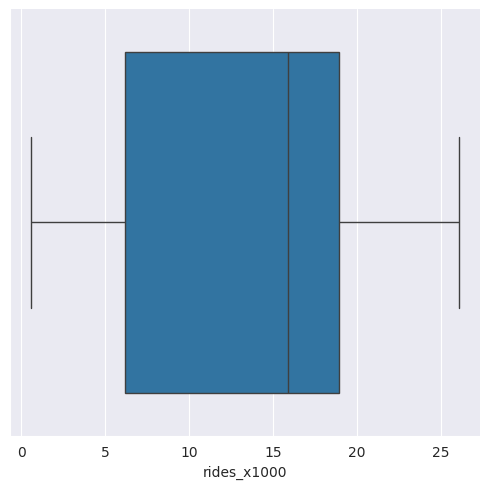

In [26]:
sns.catplot(data=train_df_cl, x='rides_x1000', kind='box')
# sns.boxplot

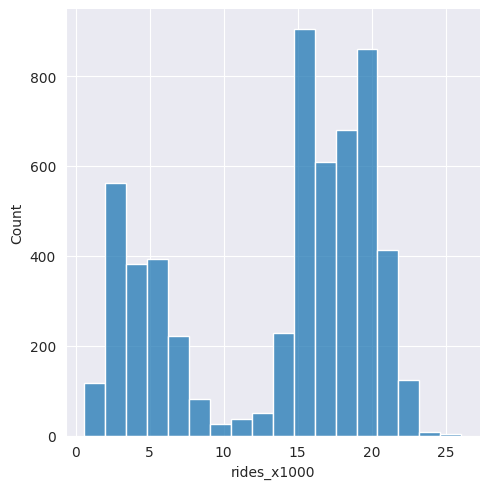

In [27]:
sns.displot(data=train_df_cl, x='rides_x1000')

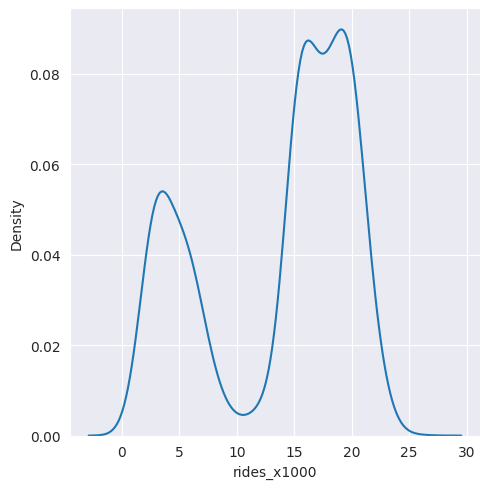

In [28]:
sns.displot(data=train_df_cl, x='rides_x1000', kind='kde')

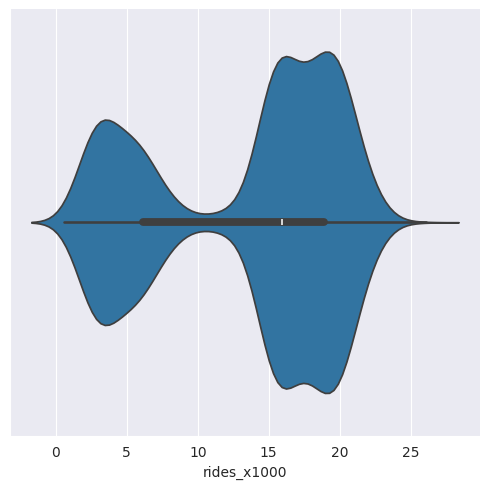

In [29]:
sns.catplot(data=train_df_cl, x='rides_x1000', kind='violin')

<Axes: xlabel='rides_x1000', ylabel='Density'>

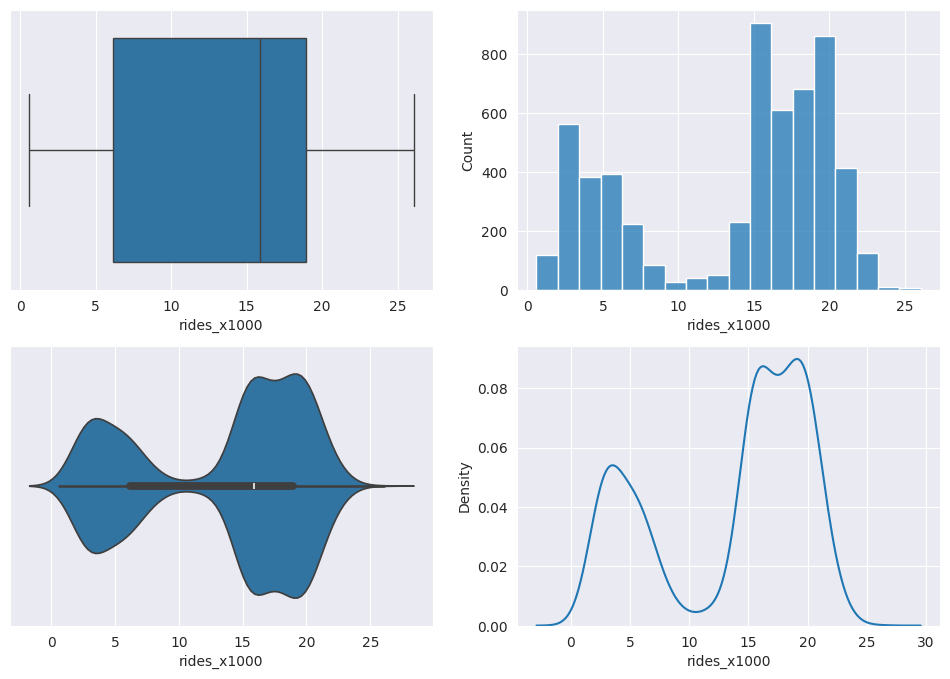

In [30]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid 2 rows, 2 columns
sns.boxplot(data=train_df_cl, x='rides_x1000', ax=axs[0,0])
sns.histplot(data=train_df_cl, x='rides_x1000', ax=axs[0,1])
sns.violinplot(data=train_df_cl, x='rides_x1000', ax=axs[1,0])
sns.kdeplot(data=train_df_cl, x='rides_x1000', ax=axs[1,1])

### Increasing visualizations with facets, colors and shapes

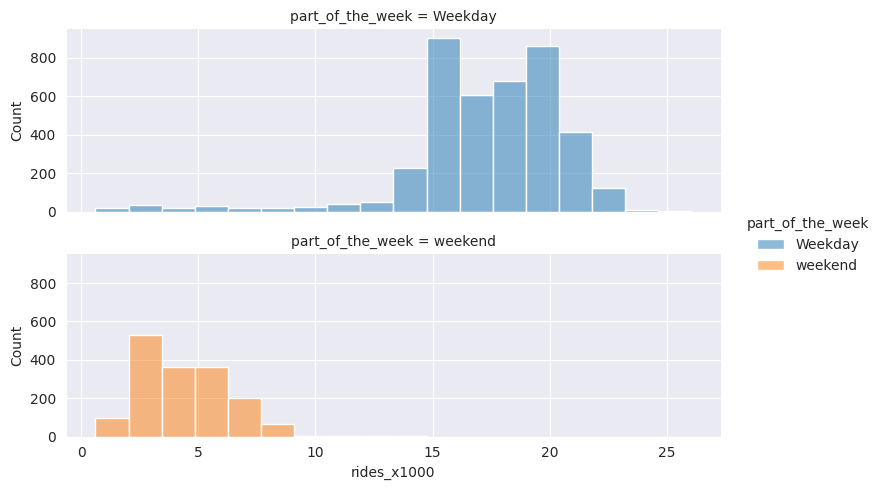

In [31]:
sns.displot(data=train_df_cl, x='rides_x1000', row='part_of_the_week', hue='part_of_the_week',
            height=2.5, aspect=3)

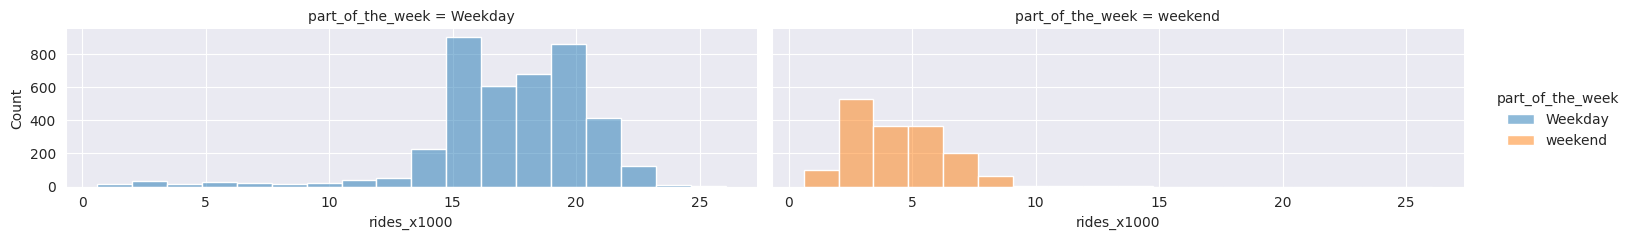

In [32]:
sns.displot(data=train_df_cl, x='rides_x1000', col='part_of_the_week', hue='part_of_the_week',
            height=2.5, aspect=3)

## Scatter plots



In [33]:
train_df_cl

,rides,part_of_the_week,rides_x1000
date,,,
2001-01-22,15732,Weekday,15.732
2001-01-23,15762,Weekday,15.762
2001-01-24,15872,Weekday,15.872
2001-01-25,15874,Weekday,15.874
2001-01-26,15423,Weekday,15.423
...,...,...,...
2016-08-24,20651,Weekday,20.651
2016-08-25,21282,Weekday,21.282
2016-08-26,20528,Weekday,20.528


In [34]:
train_df_cl['two_week_lag_rides']=train_df_cl['rides'].shift(periods=14, fill_value=0)
train_df_cl['two_week_lag_rides_x1000']=train_df_cl['two_week_lag_rides']/1000
train_df_cl.head(16) # 2주의 값 밀림

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000
date,,,,,
2001-01-22,15732,Weekday,15.732,0,0.000
2001-01-23,15762,Weekday,15.762,0,0.000
2001-01-24,15872,Weekday,15.872,0,0.000
2001-01-25,15874,Weekday,15.874,0,0.000
2001-01-26,15423,Weekday,15.423,0,0.000
2001-01-27,2425,weekend,2.425,0,0.000
2001-01-28,1467,weekend,1.467,0,0.000
2001-01-29,15511,Weekday,15.511,0,0.000
2001-01-30,15927,Weekday,15.927,0,0.000


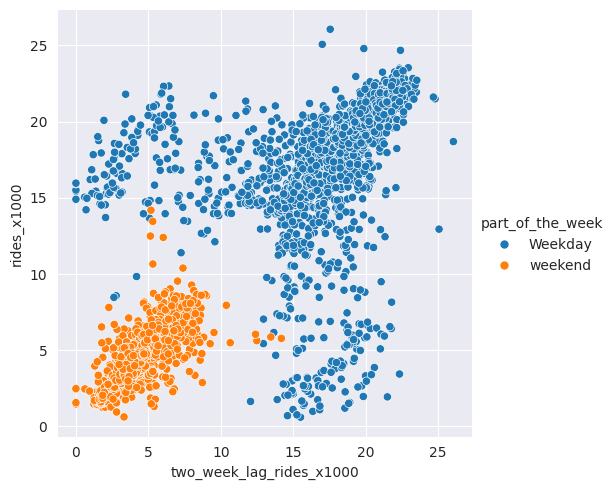

In [35]:
#sns.scatterplot 양의 상관관계를 알 수 있음
sns.relplot(data=train_df_cl, x='two_week_lag_rides_x1000', y='rides_x1000', hue='part_of_the_week')

## Heatmaps

We create an indicator variable for weekday values that are less than 10,000 passengers

In [36]:
train_df_cl['rides']<10000

date
2001-01-22    False
2001-01-23    False
2001-01-24    False
2001-01-25    False
2001-01-26    False
              ...  
2016-08-24    False
2016-08-25    False
2016-08-26    False
2016-08-27     True
2016-08-28     True
Name: rides, Length: 5698, dtype: bool

In [37]:
(train_df_cl['rides']<10000).astype(int)

date
2001-01-22    0
2001-01-23    0
2001-01-24    0
2001-01-25    0
2001-01-26    0
             ..
2016-08-24    0
2016-08-25    0
2016-08-26    0
2016-08-27    1
2016-08-28    1
Name: rides, Length: 5698, dtype: int64

In [38]:
train_df_cl['less_than_1000']=(train_df_cl['rides']<10000).astype(int)
train_df_cl.head(3)
train_df_cl['month_name']= train_df_cl.index.month_name()
train_df_cl['month']=train_df_cl.index.month
train_df_cl['day']=train_df_cl.index.day
train_df_cl['month_day']=train_df_cl['month'].apply('{:0>2d}'.format) + '-' + train_df_cl['day'].apply('{:0>2d}'.format)
train_df_cl['year']=train_df_cl.index.year
train_df_cl.head()

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year
date,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.0,0,January,1,22,01-22,2001
2001-01-23,15762,Weekday,15.762,0,0.0,0,January,1,23,01-23,2001
2001-01-24,15872,Weekday,15.872,0,0.0,0,January,1,24,01-24,2001
2001-01-25,15874,Weekday,15.874,0,0.0,0,January,1,25,01-25,2001
2001-01-26,15423,Weekday,15.423,0,0.0,0,January,1,26,01-26,2001


How can we create the source table for creating a heatmap?

In [39]:
train_df_cl[train_df_cl['part_of_the_week']=='Weekday']

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year
date,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.000,0,January,1,22,01-22,2001
2001-01-23,15762,Weekday,15.762,0,0.000,0,January,1,23,01-23,2001
2001-01-24,15872,Weekday,15.872,0,0.000,0,January,1,24,01-24,2001
2001-01-25,15874,Weekday,15.874,0,0.000,0,January,1,25,01-25,2001
2001-01-26,15423,Weekday,15.423,0,0.000,0,January,1,26,01-26,2001
...,...,...,...,...,...,...,...,...,...,...,...
2016-08-22,21157,Weekday,21.157,21177,21.177,0,August,8,22,08-22,2016
2016-08-23,21323,Weekday,21.323,21455,21.455,0,August,8,23,08-23,2016
2016-08-24,20651,Weekday,20.651,21788,21.788,0,August,8,24,08-24,2016


In [40]:
train_df_cl[train_df_cl['part_of_the_week']=='Weekday'].pivot_table(index='month_day', columns='year', values='less_than_1000', fill_value=0)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month_day,,,,,,,,,,,,,,,,
01-01,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1
01-02,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
heat_map_data=train_df_cl[train_df_cl['part_of_the_week']=='Weekday'].pivot_table(index='month_day', columns='year', values='less_than_1000', fill_value=0)

<Axes: xlabel='year', ylabel='month_day'>

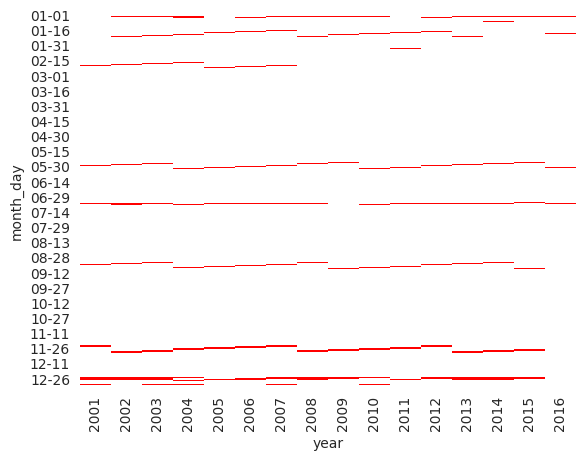

In [43]:
sns.heatmap(data=heat_map_data, cmap=['white','red'], cbar=False)

Now that we know the effect of holidays in the dataset, we can remove those days.

For that we use the **extra\_data** dataset that we loaded at the beginning.

In [44]:
common_holidays = ['USNewYearsDay', 'Jan02_Mon_Fri', 'USMLKingsBirthday',
    'USPresidentsDay', 'USMemorialDay', 'USIndependenceDay',
    'Jul03_Mon_Fri', 'Jul05_Mon_Fri', 'USLaborDay', 'USThanksgivingDay',
    'Day_after_Thx', 'ChristmasEve', 'USChristmasDay', 'Dec26_wkday',
    'Dec31_Mon_Fri']

In [45]:
extra_data.head(3)

,Advent1st,Advent2nd,Advent3rd,Advent4th,AllSaints,AllSouls,Annunciation,Ascension,AshWednesday,AssumptionOfMary,...,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,l14_gas_price,l30_unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.516,NaN
2001-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.516,NaN
2001-01-24,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.516,NaN


In [46]:
dates_with_holiday = (extra_data[common_holidays]==1).any(axis=1)

In [49]:
np.array([True, False, False, False]).any() # True가 한개라도 있으면 True

True

In [50]:
np.array([True, False, False, False]).all()

False

In [52]:
dates_with_holiday

date
2001-01-22    False
2001-01-23    False
2001-01-24    False
2001-01-25    False
2001-01-26    False
              ...  
2016-08-24    False
2016-08-25    False
2016-08-26    False
2016-08-27    False
2016-08-28    False
Length: 5698, dtype: bool

In [53]:
train_df_cl['holiday'] = dates_with_holiday.astype(int)
train_df_cl.head()

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year,holiday
date,,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.0,0,January,1,22,01-22,2001,0
2001-01-23,15762,Weekday,15.762,0,0.0,0,January,1,23,01-23,2001,0
2001-01-24,15872,Weekday,15.872,0,0.0,0,January,1,24,01-24,2001,0
2001-01-25,15874,Weekday,15.874,0,0.0,0,January,1,25,01-25,2001,0
2001-01-26,15423,Weekday,15.423,0,0.0,0,January,1,26,01-26,2001,0


In [55]:
train_df_cl['two_week_lag_holiday']=train_df_cl['holiday'].shift(periods=14, fill_value=0)
train_df_cl.head(25)

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year,holiday,two_week_lag_holiday
date,,,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.000,0,January,1,22,01-22,2001,0,0
2001-01-23,15762,Weekday,15.762,0,0.000,0,January,1,23,01-23,2001,0,0
2001-01-24,15872,Weekday,15.872,0,0.000,0,January,1,24,01-24,2001,0,0
2001-01-25,15874,Weekday,15.874,0,0.000,0,January,1,25,01-25,2001,0,0
2001-01-26,15423,Weekday,15.423,0,0.000,0,January,1,26,01-26,2001,0,0
2001-01-27,2425,weekend,2.425,0,0.000,1,January,1,27,01-27,2001,0,0
2001-01-28,1467,weekend,1.467,0,0.000,1,January,1,28,01-28,2001,0,0
2001-01-29,15511,Weekday,15.511,0,0.000,0,January,1,29,01-29,2001,0,0
2001-01-30,15927,Weekday,15.927,0,0.000,0,January,1,30,01-30,2001,0,0


We filter the data set with days that are not holidays and that do not have a holiday with a delay of two weeks.

In [57]:
train_df_cl_no_holiday = train_df_cl[(train_df_cl['holiday']==0) & (train_df_cl.two_week_lag_holiday==0)]
train_df_cl_no_holiday

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year,holiday,two_week_lag_holiday
date,,,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.000,0,January,1,22,01-22,2001,0,0
2001-01-23,15762,Weekday,15.762,0,0.000,0,January,1,23,01-23,2001,0,0
2001-01-24,15872,Weekday,15.872,0,0.000,0,January,1,24,01-24,2001,0,0
2001-01-25,15874,Weekday,15.874,0,0.000,0,January,1,25,01-25,2001,0,0
2001-01-26,15423,Weekday,15.423,0,0.000,0,January,1,26,01-26,2001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,20651,Weekday,20.651,21788,21.788,0,August,8,24,08-24,2016,0,0
2016-08-25,21282,Weekday,21.282,21471,21.471,0,August,8,25,08-25,2016,0,0
2016-08-26,20528,Weekday,20.528,19606,19.606,0,August,8,26,08-26,2016,0,0


In [60]:
train_df_cl_no_holiday.columns

Index(['rides', 'part_of_the_week', 'rides_x1000', 'two_week_lag_rides',
       'two_week_lag_rides_x1000', 'less_than_1000', 'month_name', 'month',
       'day', 'month_day', 'year', 'holiday', 'two_week_lag_holiday'],
      dtype='object')

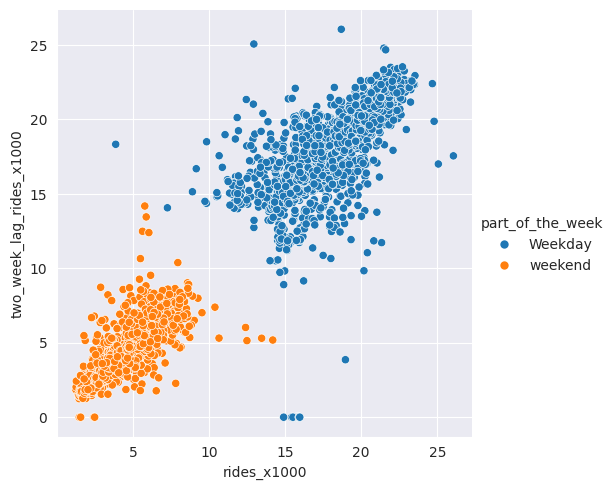

In [61]:
sns.relplot(data=train_df_cl_no_holiday, x='rides_x1000', y='two_week_lag_rides_x1000', hue='part_of_the_week')

## Correlation Matrix Plots

We add the characteristics we created for our data subset containing only the Clark / Lake station.

In [63]:
df

,station_id,stationname,daytype,rides,part_of_the_week
date,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday
2001-01-01,41130,Halsted-Orange,U,306,Weekday
2001-01-01,40350,UIC-Halsted,U,273,Weekday
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday
2001-01-01,40740,Western-Cermak,U,0,Weekday
...,...,...,...,...,...
2020-11-30,41020,Logan Square,W,1009,Weekday
2020-11-30,40090,Damen-Brown,W,359,Weekday
2020-11-30,41380,Bryn Mawr,W,920,Weekday


In [65]:
df['part_of_the_week']=df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend') # find if it is weekday or weekend
df

,station_id,stationname,daytype,rides,part_of_the_week
date,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday
2001-01-01,41130,Halsted-Orange,U,306,Weekday
2001-01-01,40350,UIC-Halsted,U,273,Weekday
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday
2001-01-01,40740,Western-Cermak,U,0,Weekday
...,...,...,...,...,...
2020-11-30,41020,Logan Square,W,1009,Weekday
2020-11-30,40090,Damen-Brown,W,359,Weekday
2020-11-30,41380,Bryn Mawr,W,920,Weekday


In [66]:
train_df_cl.head(3)

,rides,part_of_the_week,rides_x1000,two_week_lag_rides,two_week_lag_rides_x1000,less_than_1000,month_name,month,day,month_day,year,holiday,two_week_lag_holiday
date,,,,,,,,,,,,,
2001-01-22,15732,Weekday,15.732,0,0.0,0,January,1,22,01-22,2001,0,0
2001-01-23,15762,Weekday,15.762,0,0.0,0,January,1,23,01-23,2001,0,0
2001-01-24,15872,Weekday,15.872,0,0.0,0,January,1,24,01-24,2001,0,0


In [68]:
df.groupby('stationname')['rides'].shift(14, fill_value=0)

date
2001-01-01       0
2001-01-01       0
2001-01-01       0
2001-01-01       0
2001-01-01       0
              ... 
2020-11-30    1134
2020-11-30     410
2020-11-30     924
2020-11-30     420
2020-11-30    2238
Name: rides, Length: 1036763, dtype: int64

In [71]:
df['two_week_lag_rides'] = df.groupby('stationname')['rides'].shift(14, fill_value=0)
df

,station_id,stationname,daytype,rides,part_of_the_week,two_week_lag_rides
date,,,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457,Weekday,0
2001-01-01,41130,Halsted-Orange,U,306,Weekday,0
2001-01-01,40350,UIC-Halsted,U,273,Weekday,0
2001-01-01,40450,95th/Dan Ryan,U,3948,Weekday,0
2001-01-01,40740,Western-Cermak,U,0,Weekday,0
...,...,...,...,...,...,...
2020-11-30,41020,Logan Square,W,1009,Weekday,1134
2020-11-30,40090,Damen-Brown,W,359,Weekday,410
2020-11-30,41380,Bryn Mawr,W,920,Weekday,924


In [73]:
df[df['stationname']=='Jefferson Park'].head(16)

,station_id,stationname,daytype,rides,part_of_the_week,two_week_lag_rides
date,,,,,,
2001-01-01,41280,Jefferson Park,U,1302,Weekday,0
2001-01-02,41280,Jefferson Park,W,5812,Weekday,0
2001-01-03,41280,Jefferson Park,W,6171,Weekday,0
2001-01-04,41280,Jefferson Park,W,6385,Weekday,0
2001-01-05,41280,Jefferson Park,W,6334,Weekday,0
2001-01-06,41280,Jefferson Park,A,2692,Weekend,0
2001-01-07,41280,Jefferson Park,U,1856,Weekend,0
2001-01-08,41280,Jefferson Park,W,6595,Weekday,0
2001-01-09,41280,Jefferson Park,W,6750,Weekday,0


In [81]:
df['holiday']=False

In [82]:
df.loc[df.index.intersection(dates_with_holiday[dates_with_holiday].index), 'holiday']=True #setting the holidays to true

After this, we take only the records corresponding to the year 2016

In [83]:
all_2016 = df.loc[train_days.index].loc['2016']
all_2016

,station_id,stationname,daytype,rides,part_of_the_week,two_week_lag_rides,holiday
date,,,,,,,
2016-01-01,40340,Berwyn,U,1703,Weekday,3593,True
2016-01-01,41040,Kedzie-Cermak,U,501,Weekday,1149,True
2016-01-01,41410,Chicago/Milwaukee,U,1923,Weekday,4366,True
2016-01-01,41510,Morgan-Lake,U,1007,Weekday,2837,True
2016-01-01,41480,Western-Brown,U,1602,Weekday,4181,True
...,...,...,...,...,...,...,...
2016-08-28,41090,Monroe/State,U,3192,Weekend,3898,False
2016-08-28,40040,Quincy/Wells,U,1302,Weekend,1646,False
2016-08-28,40830,18th,U,1022,Weekend,892,False


We take the data only for weekdays and that are not holidays

In [84]:
clustermap_data=all_2016[(all_2016['part_of_the_week']=='Weekday') & (all_2016['holiday']==False)][['stationname','two_week_lag_rides']]
clustermap_data

,stationname,two_week_lag_rides
date,,
2016-01-04,Damen-Cermak,1313
2016-01-04,Halsted-Orange,2338
2016-01-04,Harlem-Forest Park,1021
2016-01-04,King Drive,562
2016-01-04,Cicero-Forest Park,1231
...,...,...
2016-08-26,Damen-Brown,2545
2016-08-26,Randolph/Wabash,9388
2016-08-26,Oak Park-Forest Park,1646


We create the pivot table where the rows are the days of the year 2016, and the columns are the seasons. Each cell in the data set represents the number of passengers for a specific station and day.

In [86]:
rides_by_station_pivot = clustermap_data.pivot(columns='stationname', values='two_week_lag_rides')
rides_by_station_pivot

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1688,1255,2717,975,2780,1230,920,2113,2548,4949,...,2465,12979,7023,2593,3631,1081,1409,3537,4787,4549
2016-01-05,1744,1324,2893,1008,2883,1243,1035,2128,2617,5134,...,2513,14158,6883,2695,3906,1067,1461,3560,5016,4506
2016-01-06,1574,1191,2734,954,2767,1249,940,2015,2449,4909,...,1983,11290,5403,2046,3274,1012,1334,3327,4342,4203
2016-01-07,974,963,1711,743,2490,1105,865,1403,2322,4394,...,1038,6893,2466,950,2014,692,996,2257,2315,3328
2016-01-08,430,509,648,355,1225,521,417,633,1505,2666,...,399,2084,388,227,771,329,574,801,861,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-22,1786,1418,2917,1114,3138,1179,1006,2122,2975,5178,...,2936,12107,8936,2967,3886,1070,1434,3809,5029,4843
2016-08-23,1836,1493,3125,1195,3251,1248,912,2403,2915,5325,...,3083,13550,8874,3189,4182,1131,1454,4073,5258,5074
2016-08-24,1883,1564,3007,1222,3229,1245,1083,2306,3060,5374,...,3183,12849,8944,3191,4318,1156,1462,3863,5252,5017


We create the correlation matrix, and then we generate the graph. Which also includes a clustering function for the stations. That is, the stations with the highest positive correlation are contiguous and the stations with the highest negative correlation are far apart. This is represented with a dendrogram on the axes of the graph.

In [88]:
corr_matrix = rides_by_station_pivot.corr()
corr_matrix.head()

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
stationname,,,,,,,,,,,,,,,,,,,,,
18th,1.000000,0.679041,0.798401,0.792676,0.789774,0.764942,0.783518,0.832925,0.722220,0.794719,...,0.344460,0.735014,0.717914,0.790091,0.820565,0.879284,0.734502,0.794533,0.808851,0.644276
35-Bronzeville-IIT,0.679041,1.000000,0.801438,0.663409,0.744200,0.704231,0.657079,0.600548,0.739915,0.746875,...,0.705763,0.611765,0.676933,0.763108,0.743203,0.712168,0.811742,0.744643,0.785952,0.799698
35th/Archer,0.798401,0.801438,1.000000,0.866700,0.903242,0.818159,0.846078,0.831277,0.904584,0.903317,...,0.498265,0.864146,0.866936,0.920619,0.938364,0.880919,0.906020,0.969823,0.942533,0.892626
43rd,0.792676,0.663409,0.866700,1.000000,0.904365,0.858234,0.907250,0.896398,0.818800,0.916755,...,0.235530,0.891858,0.840709,0.869339,0.902351,0.865034,0.789620,0.912895,0.877264,0.689813
47th-Dan Ryan,0.789774,0.744200,0.903242,0.904365,1.000000,0.875273,0.904469,0.823925,0.898567,0.943388,...,0.339380,0.824263,0.776433,0.844952,0.899332,0.870022,0.874285,0.905581,0.875514,0.738909


In [89]:
corr_matrix.loc['O\'Hare Airport','UIC-Halsted']

-0.4639544813643622

In [90]:
corr_matrix.loc['Harlem-Lake','Quincy/Wells']

0.8410756562507453

<Axes: xlabel='stationname', ylabel='stationname'>

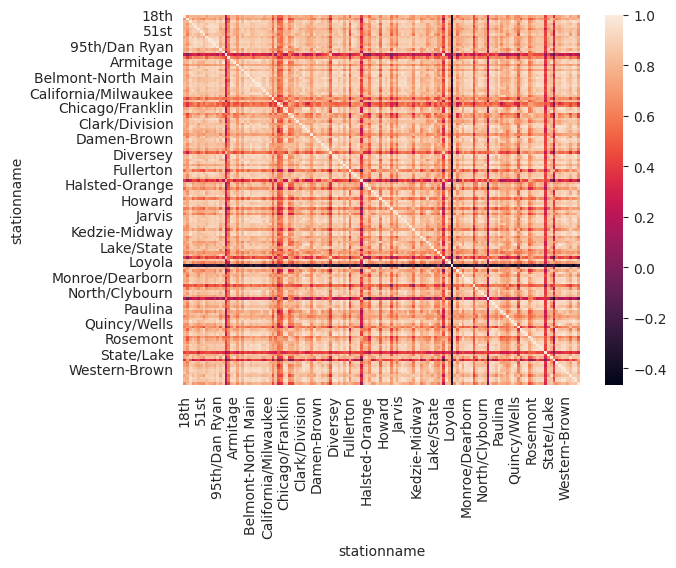

In [91]:
sns.heatmap(corr_matrix)

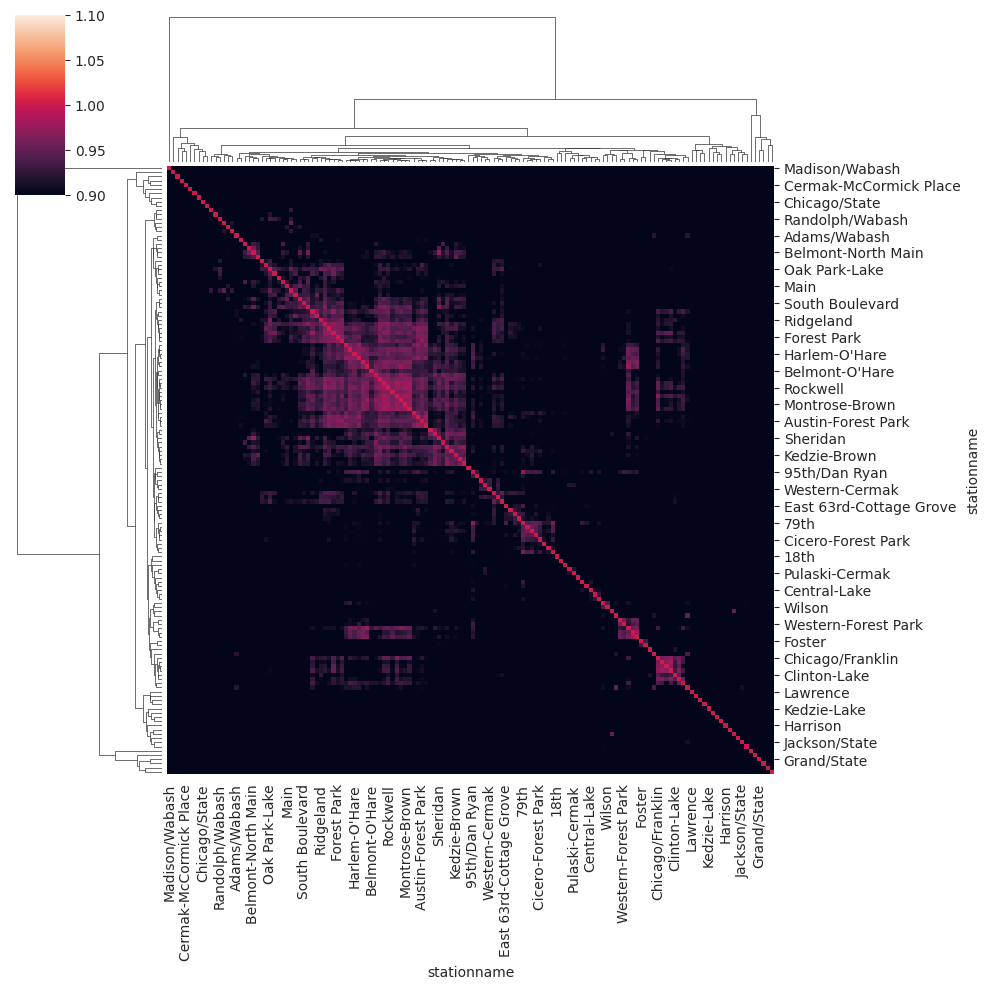

In [93]:
sns.clustermap(corr_matrix, vmin=1, vmax=1)

## Line charts

In [96]:
line_plot_data_mean = train_df_cl.resample('M').agg({'rides_x1000':'mean','month_name': max, 'year':max})
line_plot_data_mean

,rides_x1000,month_name,year
date,,,
2001-01-31,12.991300,January,2001
2001-02-28,11.507571,February,2001
2001-03-31,12.486387,March,2001
2001-04-30,11.961867,April,2001
2001-05-31,12.320387,May,2001
...,...,...,...
2016-04-30,16.305167,April,2016
2016-05-31,16.300097,May,2016
2016-06-30,17.876433,June,2016


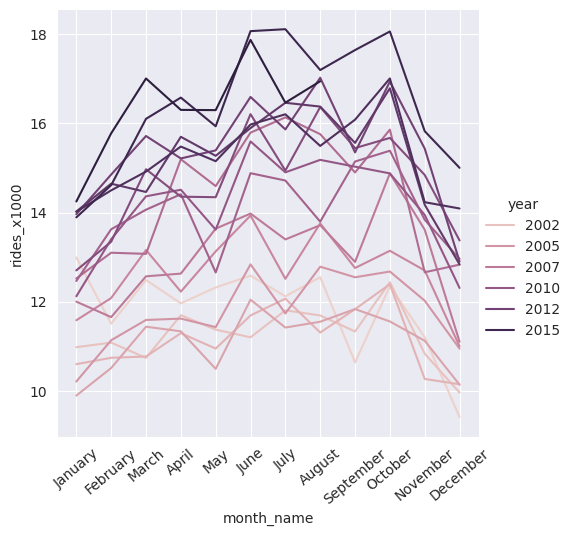

In [102]:
g = sns.relplot(data=line_plot_data_mean, x='month_name', y='rides_x1000', kind='line', hue='year')
g.set_xticklabels(rotation=40)

In [111]:
line_plot_data_mean = train_df_cl.groupby('part_of_the_week').resample('M').agg({'rides_x1000':'mean','month_name': max, 'year':max}).reset_index(level=0)
line_plot_data_mean

,part_of_the_week,rides_x1000,month_name,year
date,,,,
2001-01-31,Weekday,15.752625,January,2001
2001-02-28,Weekday,15.290150,February,2001
2001-03-31,Weekday,16.524500,March,2001
2001-04-30,Weekday,16.077429,April,2001
2001-05-31,Weekday,15.739174,May,2001
...,...,...,...,...
2016-04-30,weekend,5.636111,April,2016
2016-05-31,weekend,6.202556,May,2016
2016-06-30,weekend,6.311625,June,2016


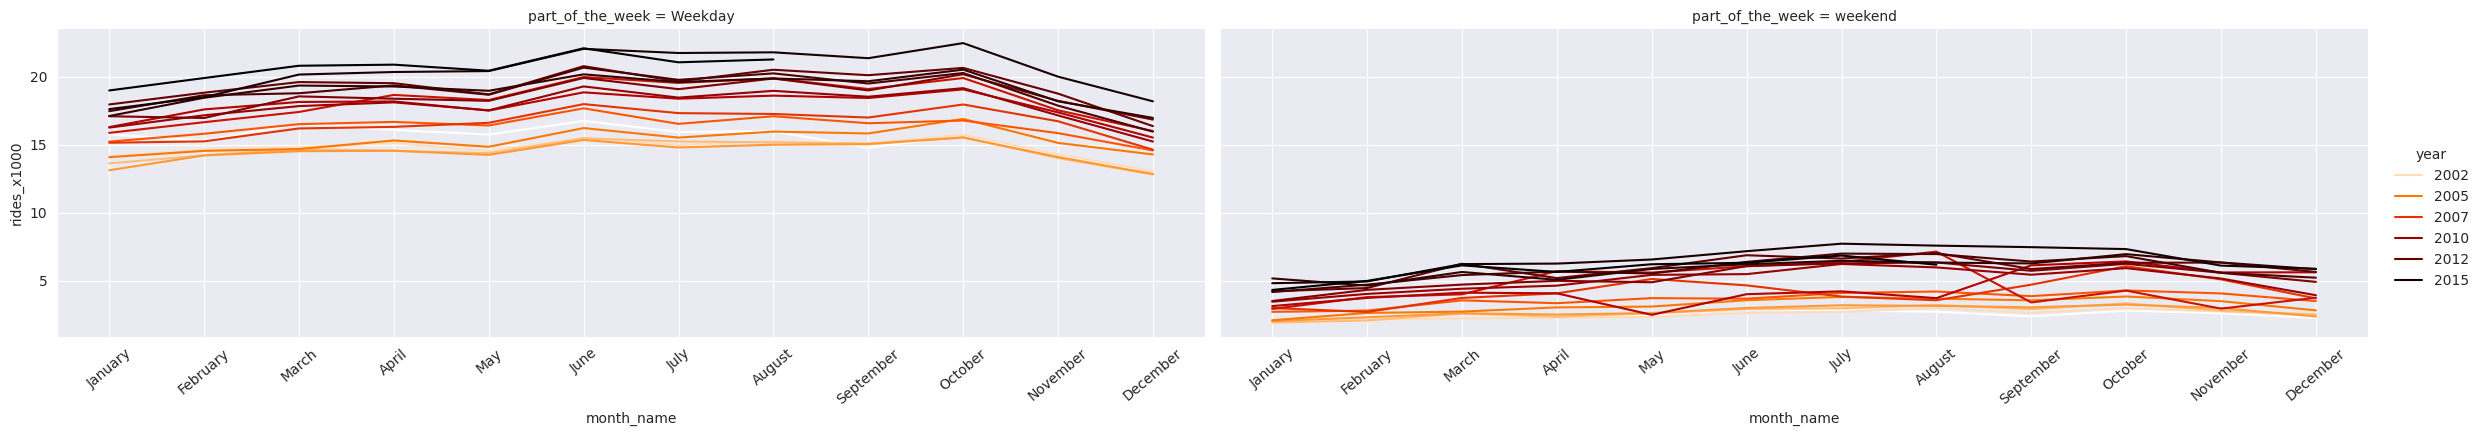

In [112]:
g = sns.relplot(data=line_plot_data_mean, x='month_name', y='rides_x1000',
                kind='line', hue='year', col='part_of_the_week',
                height=4, aspect=3, palette='gist_heat_r')
g.set_xticklabels(rotation=40)

In [113]:
import plotly.express as px

In [116]:
fig = px.line(line_plot_data_mean, x='month_name', y='rides_x1000',
              color='year', facet_col='part_of_the_week')
fig

Average weekly prices in Chicago have been recorded. We load the file and generate a line graph to see if there is any relationship with the number of passengers.

In [ ]:
gas_price_df = pd.read_csv('data/chicago_gas_prices.csv',index_col=0, parse_dates=True)

In [ ]:
gas_price_df = gas_price_df.sort_index()

In [ ]:
gas_price_df['month_name'] = gas_price_df.index.month_name()
gas_price_df['year'] = gas_price_df.index.year
gas_price_df['part_of_the_week']=gas_price_df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

Now let's see if there is any relationship between average gasoline prices and the number of passengers.

For this we calculate the monthly average of gasoline prices with a delay of 2 weeks and plot it against the geometric mean of the number of passengers at the Clark / Lake station.

In [ ]:
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekday', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekend', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.head()

In [ ]:
line_plot_data_mean.year = line_plot_data_mean.year.astype(str) # we make it string so it is considered categorical variable

# Visualiation of categorical variables

## Uploading data to various pandas DataFrames


In [117]:
urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 278MB/s]


In [119]:
df = pd.read_csv('data/okc_train.csv',index_col=0)
df.head()

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.382377,other,7


In [120]:
df.shape

(38809, 38)

<Axes: xlabel='Class', ylabel='count'>

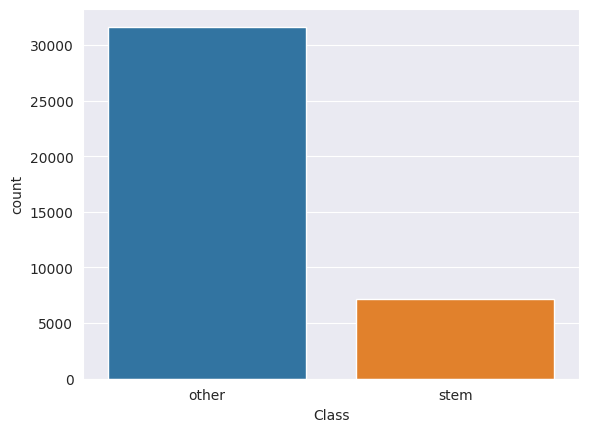

In [124]:
sns.countplot(data=df, x='Class', hue='Class')

In [121]:
df['Class']

1        other
4        other
6         stem
8        other
10       other
         ...  
59940    other
59943    other
59944    other
59945    other
59946    other
Name: Class, Length: 38809, dtype: object

In [127]:
df['drinks'].unique()

array(['socially', 'not_at_all', 'rarely', 'often', 'drinks_missing',
       'very_often', 'desperately'], dtype=object)

In [128]:
df['drinks'].value_counts()

socially          27521
rarely             3981
often              3413
not_at_all         2157
drinks_missing     1208
very_often          319
desperately         210
Name: drinks, dtype: int64

<Axes: xlabel='drinks', ylabel='count'>

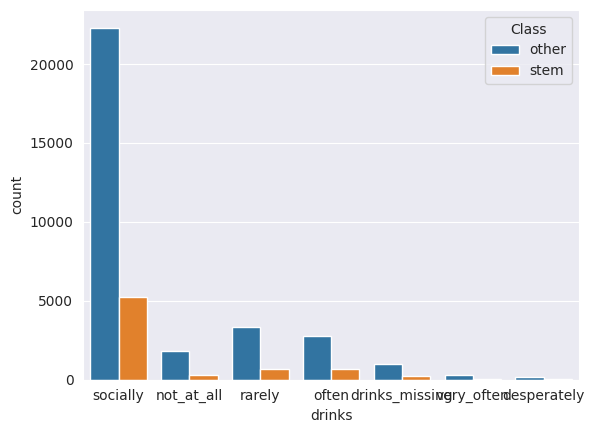

In [132]:
sns.countplot(data=df, x='drinks', hue='Class')

In [129]:
df['diet'].value_counts()

diet_missing           14698
mostly_anything        11430
anything                4096
strictly_anything       3440
mostly_vegetarian       2313
mostly_other             700
strictly_vegetarian      588
vegetarian               448
strictly_other           304
mostly_vegan             220
other                    217
strictly_vegan           142
vegan                     82
mostly_kosher             59
mostly_halal              39
strictly_kosher           11
strictly_halal            10
kosher                     9
halal                      3
Name: diet, dtype: int64

<Axes: xlabel='diet', ylabel='count'>

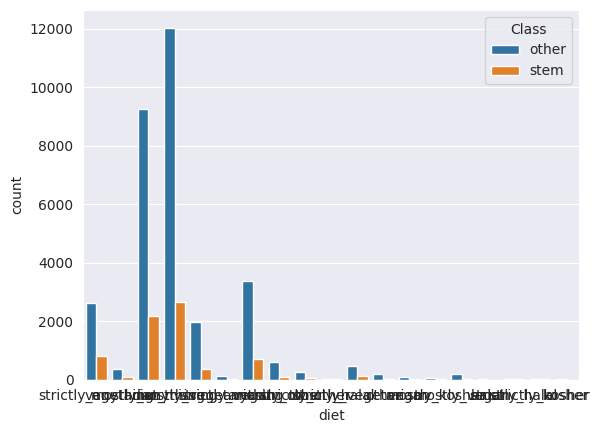

In [156]:
sns.countplot(data=df, x='diet', hue='Class')

## Bar chart

The bar chart is the most common way to present counts on categorical variables.

Let's use the category of religion for the first examples.

We create the dataset of the count of the two classes (i.e., stem and other) by value in the religion category

We present a bar graph partitioned and colored by the category of the target variable.

In [134]:
sns.catplot?

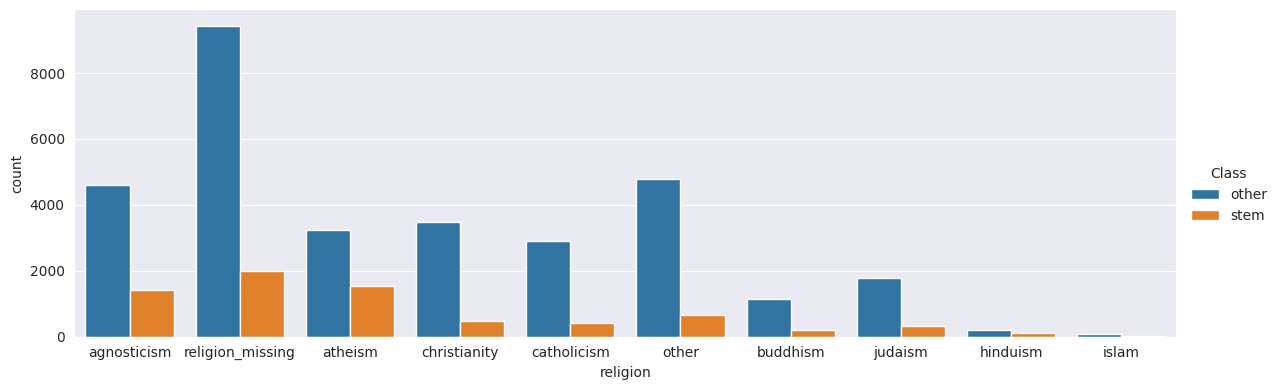

In [138]:
sns.catplot(data=df, x='religion', kind='count', hue='Class',
            height=4, aspect=3)

In [145]:
bar_data = df.groupby(['religion','Class']).size().reset_index(name='counts')
bar_data

,religion,Class,counts
0,agnosticism,other,4590
1,agnosticism,stem,1411
2,atheism,other,3251
3,atheism,stem,1526
4,buddhism,other,1148
5,buddhism,stem,211
6,catholicism,other,2906
7,catholicism,stem,419
8,christianity,other,3486
9,christianity,stem,488


In [150]:
px.bar(data_frame=bar_data, x='religion', y='counts',
       color='Class', barmode= 'group', # group, overlay, relative 3가지가 존재
       width=800, height=500)

In [151]:
px.bar(data_frame=bar_data, x='religion', y='counts',
       color='Class', barmode= 'overlay', # group, overlay, relative 3가지가 존재
       width=800, height=500)

In [152]:
px.bar(data_frame=bar_data, x='religion', y='counts',
       color='Class', barmode= 'relative', # group, overlay, relative 3가지가 존재
       width=800, height=500)

In [158]:
c = df.groupby(['religion','Class']).size().rename("counts")
bar_percentage_data = (c/c.groupby(level=0).sum()).reset_index(name='proportion')
bar_percentage_data

,religion,Class,proportion
0,agnosticism,other,0.764873
1,agnosticism,stem,0.235127
2,atheism,other,0.680553
3,atheism,stem,0.319447
4,buddhism,other,0.844739
5,buddhism,stem,0.155261
6,catholicism,other,0.873985
7,catholicism,stem,0.126015
8,christianity,other,0.877202
9,christianity,stem,0.122798


In [159]:
px.bar(data_frame=bar_percentage_data, x='religion', y='proportion',
       color='Class')

In [160]:
c = df.groupby(['religion','Class']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [161]:
px.bar(data_frame=bar_percentage_data.sort_values(['Class','proportion'], ascending=[True,False]),
       x='religion', y='proportion',
       color='Class',  color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400 )

## Exploring Relationships Between Categorical Predictors

In [ ]:
def return_emtpy(x):
  return ''